In [31]:
# kütüphaneleri tanımlıyoruz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 as cv
import seaborn as sns

In [32]:
# drşve a erişim sağlıyoruz
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
data = pd.read_csv('/content/drive/My Drive/HAM10000_metadata.csv') # drive içinde ki veriseti yolunu veriyoruz

In [34]:
data # veri setini görüyoruz

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [35]:
data=data.drop(columns=['lesion_id']) # lesion id siliyoruz istersek silmeyebiliriz yük olmasın diye... ve karışmasın diye. silinmesi mantıklı olan...

In [36]:
veri=data.sample(7) # 7 adet rastegele veri seçiyoruz dataset içerisinden

In [37]:
veri #görüntülüyoruz rastgele gelen değerleri

,image_id,dx,dx_type,age,sex,localization,dataset
327,ISIC_0031556,bkl,histo,60.0,male,scalp,rosendahl
1584,ISIC_0033286,mel,histo,85.0,male,chest,vidir_modern
3102,ISIC_0025528,nv,follow_up,45.0,female,trunk,vidir_molemax
9604,ISIC_0032738,nv,consensus,NaN,unknown,unknown,vidir_modern
5285,ISIC_0029506,nv,follow_up,60.0,male,abdomen,vidir_molemax
2507,ISIC_0029847,bcc,histo,40.0,female,trunk,vidir_modern
2743,ISIC_0028583,bcc,histo,65.0,male,back,rosendahl


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


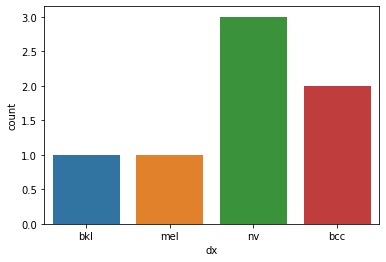

In [38]:
sns.countplot(veri['dx']) #rastegele seçilen verilerin dx değerlerini grafikte görüyuoruz.

In [39]:
PATH='/content/drive/My Drive/HAM10000_images' # resim klasörü yolunu belirtiyoruz

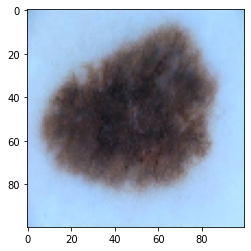

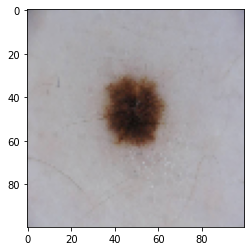

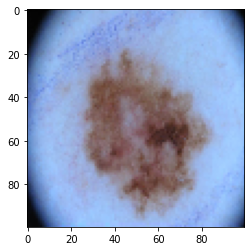

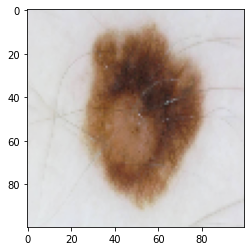

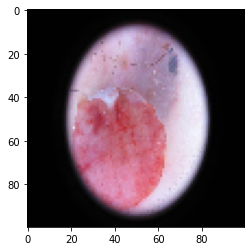

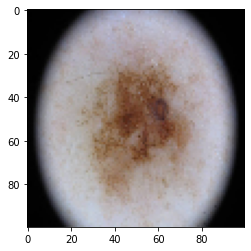

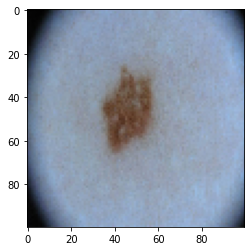

In [40]:

count=0
count2=0
image_value=[]
# for olmazsa hata alıruz öçünkü birden fazla resim alınacak...
for row in data.iterrows():
    # 6 adet resim okunsun dedik doğru değer buıdur
    if count2<=6:
      i_name='ISIC_000000'+str(count2)+'.jpg' # resimlerin isimlerihni belli algoritma ile aldık
      count2=count2+1
    else:
      break
      #dosyayı aldık ve resimleri okuduk.
    PA=os.path.join(PATH,i_name)
    img_arr=cv.imread(PA,1)

    try:
      img_arr=cv.resize(img_arr,(100,100)) # yeniden boyutlandırma işlemi yaptık.
    except:
      continue
# görüntü işleme için renklendirme işlemi yaptık. siyah beyaz vs.
    img_arr=cv.cvtColor(img_arr,cv.COLOR_BGR2RGB)
    image_value.append([img_arr,veri]) # rsimleri listeye ekledik.
    #görmek için gerekli kod
    plt.imshow(img_arr)
    plt.show() 
    # 6 olunca dur dedik
    if count==6:
        break
    count+=1

In [41]:
len(image_value)

7

In [42]:
import random
random.shuffle(image_value) # listeyi karıştırmak için kullanılan kod. rastegele vs

In [43]:
#dx değerini ve gelen rastgele veri dizisini for ile lşisteye atadık

X=[]

y=[]

for feature,label in image_value:
  X.append(feature)
  y.append(veri.dx)
len(X),len(y)


(7, 7)

In [44]:
y # dx değerlerini görüyoruz. 

[327     bkl
 1584    mel
 3102     nv
 9604     nv
 5285     nv
 2507    bcc
 2743    bcc
 Name: dx, dtype: object, 327     bkl
 1584    mel
 3102     nv
 9604     nv
 5285     nv
 2507    bcc
 2743    bcc
 Name: dx, dtype: object, 327     bkl
 1584    mel
 3102     nv
 9604     nv
 5285     nv
 2507    bcc
 2743    bcc
 Name: dx, dtype: object, 327     bkl
 1584    mel
 3102     nv
 9604     nv
 5285     nv
 2507    bcc
 2743    bcc
 Name: dx, dtype: object, 327     bkl
 1584    mel
 3102     nv
 9604     nv
 5285     nv
 2507    bcc
 2743    bcc
 Name: dx, dtype: object, 327     bkl
 1584    mel
 3102     nv
 9604     nv
 5285     nv
 2507    bcc
 2743    bcc
 Name: dx, dtype: object, 327     bkl
 1584    mel
 3102     nv
 9604     nv
 5285     nv
 2507    bcc
 2743    bcc
 Name: dx, dtype: object]

In [45]:
from sklearn.preprocessing import LabelEncoder
# verileri sayısallaştırıyoruz. dx değerlerine belli rakamlar veriyoruz. veriyi işlemek için sklearn kütüphanesi mantığı
for i in y:
  lbl=LabelEncoder()
  y=lbl.fit_transform(i)
  y.shape

In [46]:
y # verilen sayıları değerleri görüyoruz

array([1, 2, 3, 3, 3, 0, 0])

In [47]:
from sklearn.model_selection import train_test_split # test eğitim için gerekli kütüphane

In [48]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)  #test ve eğitim yapıyoruz

In [49]:
# kategorileştirme yapıyoruz... eğitimi kategorileştiriyoruz

from tensorflow.keras.utils import to_categorical

one_hot_train=to_categorical(train_y)
one_hot_train

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [50]:
#testi kategorileştirme yapıyoruz

one_hot_test=to_categorical(test_y)
one_hot_test

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [51]:
#diziyi yeniden şekillendirme
train_X=np.array(train_X).reshape(-1,100,100,3)
train_X=train_X/255.0
test_X=np.array(test_X).reshape(-1,100,100,3)
test_X=test_X/255.0

train_X.shape,test_X.shape,one_hot_train.shape,one_hot_test.shape

((5, 100, 100, 3), (2, 100, 100, 3), (5, 4), (2, 4))

In [52]:
# gerekli kütüphaneleri ekliyoruz
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
#from tensorflow.keras.callbacks import History as history

In [53]:
# Bir Sequentialmodel, her katmanın tam olarak bir giriş tensörüne ve bir çıkış tensörüne sahip olduğu düz bir katman yığını için uygundur .

# keras içim model eğitimi seçini denilebilir

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.40))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.20))

'''model.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.40))'''

model.add(Flatten())

model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128, activation='linear'))
model.add(Dense(256, activation='linear'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 50, 50, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 25, 25, 64)       

In [54]:
# modeli compile ediyoruz. derliyoruz yani...

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#train_y modelini alcaz
history=model.fit(train_X,train_y,batch_size=128,epochs=10,validation_split=0.2) # ve sşimdi de modeli eğitiyıoruz... historiy içine atıyopruz

Epoch 1/10
1/1 [==============================] - 1s 975ms/step - loss: 1.8990 - accuracy: 0.2500 - val_loss: 3.6581 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 150ms/step - loss: 1.6828 - accuracy: 0.5000 - val_loss: 3.3368 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 139ms/step - loss: 2.4454 - accuracy: 0.5000 - val_loss: 2.6255 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 129ms/step - loss: 1.9822 - accuracy: 0.2500 - val_loss: 2.2348 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 151ms/step - loss: 1.0223 - accuracy: 0.5000 - val_loss: 2.1332 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 135ms/step - loss: 1.0135 - accuracy: 0.5000 - val_loss: 2.1107 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 149ms/step - loss: 1.0450 - accuracy: 0.5000 - val_loss: 2.1323 - val_accuracy: 0.0

In [55]:
test_loss,test_acc=model.evaluate(test_X,test_y) # modeli değerlendiiroyruz. test işlemlerini

1/1 [==============================] - 0s 36ms/step - loss: 1.4890 - accuracy: 0.5000


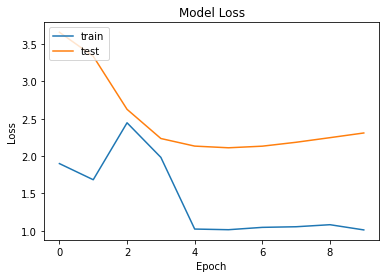

In [56]:
# sonuıçları grafiğe döküğyoruz

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

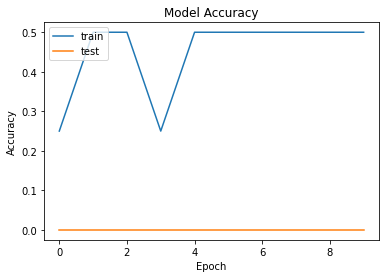

In [57]:
# sonuçları grafiğe döküyoruz.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()